In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import math

In [2]:
data = pd.read_csv('iris.csv')
data.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Initial Distribution
---

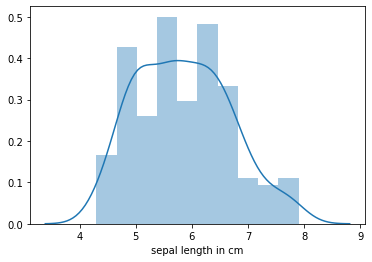

In [3]:
sns.distplot(data['sepal length in cm'],kde=True,bins=10)
plt.show()

## Equal Width Binning
---
Discretizes the feature by spliting its domain to a fixed number of equal-width intervals. <br>
The span of original domain is computed from the training data and is defined by the smallest and the largest feature value.

In [4]:
_,bins = pd.cut(data['sepal length in cm'], bins=3, retbins=True)
print("Bins ")
print("-----")
print(bins)

Bins 
-----
[4.2964 5.5    6.7    7.9   ]


Frequencies 
------------
[52. 70. 28.]


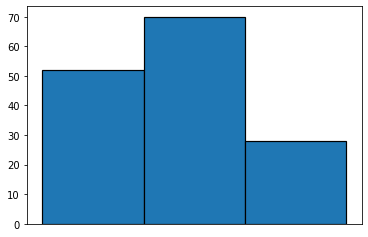

In [5]:
frequencies, bins, _ = plt.hist(data['sepal length in cm'], bins, edgecolor='black', linewidth=1.2)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
print("Frequencies ")
print("------------")
print(frequencies)

## Equal Frequency Binning
---
Discretization intervals contain approximately equal number of training data instances.

In [6]:
_, Bins = pd.qcut(data['sepal length in cm'], q=3, retbins=True)
print("Bins ")
print("-----")
print(Bins)

Bins 
-----
[4.3 5.4 6.3 7.9]


Frequencies 
------------
[46. 53. 51.]


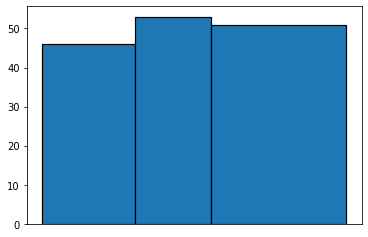

In [7]:
frequencies, Bins, _ = plt.hist(data['sepal length in cm'], Bins, edgecolor='black', linewidth=1.2)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
print("Frequencies ")
print("------------")
print(frequencies)

## Cluster Analysis
---
K-Means Clustering

Frequencies 
------------
[61. 58. 30.]


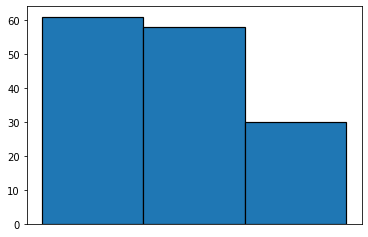

In [8]:
# importing the Iris dataset with pandas
dataset = pd.read_csv('iris.csv')
x = dataset.iloc[1:, [0]].values

# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y = kmeans.fit_predict(x)

ranges = [0,1,2,3]
frequencies,bins, _ = plt.hist(y, ranges, edgecolor='black', linewidth=1.2)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
print("Frequencies ")
print("------------")
print(frequencies)

## Cluster Analysis
---
Using Clustering Algorithm developed in Assignment 1

Frequencies 
------------
[50. 26. 74.]


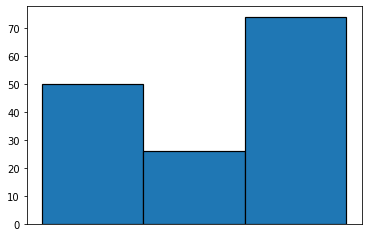

In [9]:
class Iris:

    def __init__(self,k):
        self.m = 150
        self.n = 4
        self.k = k

    def getK(self):
        return self.k

    def getData(self):

        try:
            data = np.genfromtxt('data/iris.csv', delimiter=',')

        except IOError:
            print("Missing dataset! Run:")
            print(
                "wget http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")
            exit(0)

        return data

    def normalizeData(self, data):

        low, high = np.amin(data, axis=0), np.amax(data, axis=0)
        for j in range(self.n):
            minimum, maximum = low[j], high[j]
            for i in range(self.m):
                data[i][j] = (data[i][j] - minimum)/(maximum - minimum)

        return data

    def getDissimilarityMatrix(self, data):

        mat = np.zeros(shape=(self.m, self.m))
        for i in range(self.m):
            for j in range(self.m):
                mat[i, j] = ((data[i][0] - data[j][0])**2 + (data[i][1] - data[j][1]
                                                             )**2 + (data[i][2] - data[j][2])**2 + (data[i][3] - data[j][3])**2)**0.5

        return mat

    def cluster(self, mat):

        avg = np.mean(mat, axis=0)
        clusters = []
        for i in range(self.m):
            cluster = []
            for j in range(self.m):
                if(mat[i][j] < avg[i]):
                    cluster.append(j)
            clusters.append(cluster)

        return clusters

    def removeSubsetClusters(self, clusters):

        num_clusters = len(clusters)
        i = 0
        while i < num_clusters:
            j = 0
            while j < num_clusters:
                if i != j:
                    if (set(clusters[i]).issubset(set(clusters[j]))):
                        clusters.remove(clusters[i])
                        num_clusters -= 1
                        i -= 1
                        break
                j += 1
            i += 1
        return clusters

    def getSimilarityMatrix(self, clusters):

        p = len(clusters)
        sim = np.zeros(shape=(p, p))
        for i in range(p):
            for j in range(p):
                sim[i, j] = len(list(set(clusters[i]) & set(clusters[j]))) / \
                    len(list(set(clusters[i]) | set(clusters[j])))

        return sim

    def mergeMaxSimilarityClusters(self, sim, clusters):

        val = 0
        idx_k = -1
        idx_l = -1
        p = len(clusters)
        for i in range(p):
            for j in range(p):
                if(i != j):
                    if(sim[i, j] >= val):
                        val = sim[i, j]
                        idx_k = i
                        idx_l = j

        clusters[idx_k] = list(set(clusters[idx_k]) | set(clusters[idx_l]))
        clusters.remove(clusters[idx_l])

        return clusters

    @classmethod
    def similarity_measure(cls, num1, num2):
        return abs(num1-num2)

    def notkMeansClustering(self, clusters, data):
        prob = []
        for i in range(self.m):
            temp = []
            for j in range(len(clusters)):
                temp.append(0)
            prob.append(temp)

        mean = []
        for i in range(len(clusters)):
            x = len(clusters[i])
            sumtemp = []
            for k in range(self.n):
                z = 0
                for j in range(x):
                    z += data[clusters[i][j]][k]
                    prob[clusters[i][j]][i] = 1
                z = z/x
                sumtemp.append(z)
            mean.append(sumtemp)

        dummy = [[]for _ in range(len(clusters))]
        dummy[0].append(0)
        for i in range(self.m):
            if (i == 0):
                continue
            len1 = 10000000.0
            meanind = 0
            for j in range(len(clusters)):
                if(prob[i][j] == 0):
                    continue
                else:
                    tempmean = 0
                    for k in range(self.n):
                        tempmean += (data[i][k]-mean[j][k])**2
                    tempmean = tempmean**0.5
                    if len1 > (tempmean):
                        len1 = tempmean
                        meanind = j
            dummy[meanind].append(i)
        clusters = dummy
        return clusters
    
    @classmethod
    def label(cls, clusters):
        # y_pred will contain the predicted class labels for the objects
        y_pred = []
        for i in range(150):
            # y[i] will indicate that i belongs to cluster-j
            obj = i
            for j in range(len(clusters)):
                for k in range(len(clusters[j])):
                    if clusters[j][k] == obj:
                        if len(clusters) == 3:
                            if j==0:
                                y_pred.append('Iris-setosa')
                            elif j==1:
                                y_pred.append('Iris-versicolor')
                            else:
                                y_pred.append('Iris-virginica')
                        else:
                            y_pred.append('Class ' + str(j))

        # y_true has the true class labels corresponding to each object
        y_true = []
        for i in range(150):
            if len(clusters) == 3:
                if i in range(0,51):
                    y_true.append('Iris-setosa')
                elif i in range(51,101):
                    y_true.append('Iris-versicolor')
                else :
                    y_true.append('Iris-virginica')
            else:
                if i in range(0,76):
                    y_true.append('Class 0')
                else:
                    y_true.append('Class 1')

        return y_true, y_pred

    def plot(self, clusters, i , j):
        y_true, y_pred = Iris.label(clusters)
        data = np.genfromtxt('data/iris.csv', delimiter=',')
        df_true = pd.DataFrame({'Feature_X': data[:, i], 'Feature_Y': data[:, j], 'true class': y_true})
        df_pred = pd.DataFrame({'Feature_X': data[:, i], 'Feature_Y': data[:, j], 'predicted class': y_pred})
        true_plot = sns.lmplot(data=df_true, x='Feature_X', y='Feature_Y', hue='true class', fit_reg=False, legend=True, legend_out=True)
        predicted_plot = sns.lmplot(data=df_pred, x='Feature_X', y='Feature_Y', hue='predicted class', fit_reg=False, legend=True, legend_out=True)
        return

    def pair_plot_true(self, clusters):
        y_true, _ = Iris.label(clusters)
        data = np.genfromtxt('data/iris.csv', delimiter=',')
        df_true = pd.DataFrame({'sepal length': data[:, 0], 'sepal width': data[:, 1], 'petal length': data[:, 2], 'petal width': data[:, 3], 'True class': y_true})
        sns.pairplot(df_true, hue='True class')
        return

    def pair_plot_pred(self, clusters):
        _, y_pred = Iris.label(clusters)
        data = np.genfromtxt('data/iris.csv', delimiter=',')
        df_pred = pd.DataFrame({'sepal length': data[:, 0], 'sepal width': data[:, 1], 'petal length': data[:, 2], 'petal width': data[:, 3], 'Predicted class': y_pred})
        sns.pairplot(df_pred, hue='Predicted class')
        return

model = Iris(3)
data = Iris.getData(model)
data = Iris.normalizeData(model, data)
mat = Iris.getDissimilarityMatrix(model, data)
clusters = Iris.cluster(model, mat)
cluster_original = clusters
while(len(clusters) != Iris.getK(model)):
    clusters = Iris.removeSubsetClusters(model, clusters)
    sim = Iris.getSimilarityMatrix(model, clusters)
    clusters = Iris.mergeMaxSimilarityClusters(model, sim, clusters)
clusters = Iris.notkMeansClustering(model, clusters, data)

y = []
for i in range(3):
    for j in range(len(clusters[i])):
        if i==0:
            y.append(0)
        elif i==1:
            y.append(1)
        else:
            y.append(2)

ranges = [0,1,2,3]
frequencies,bins, _ = plt.hist(y, ranges, edgecolor='black', linewidth=1.2)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
print("Frequencies ")
print("------------")
print(frequencies)

## Entropy-Based Discretisation
- One major disadvantage is that we can only get even number of bins by this method
---
References : <br>
- https://www.math.unipd.it/~dulli/corso04/disc.pdf (Section 3.3) <br>
- https://natmeurer.com/a-simple-guide-to-entropy-based-discretization/

### Step 1:  Load Data ad assign numeric class labels

In [10]:
def preprocess():
    dataset = np.genfromtxt("iris.csv", delimiter=",")
    data = dataset[1:, [0, 4]]
    for i in range(50):
        data[i, 1] = 0
    for i in range(50, 100):
        data[i, 1] = 1
    for i in range(100, 150):
        data[i, 1] = 2

    data = data[data[:,0].argsort()]
    return data

### Step 2: Find partition boundary T with minimum entropy

In [11]:
def getEntropy(S):
    M = len(S)
    dataClass , count = np.unique(S[:, 1], return_counts=True)
    entropy = 0
    for cnt in count:
        entropy += (cnt / M) * math.log2(cnt / M)
    return -1 * entropy

def getInfo(S, T):
    M = len(S)
    i = T
    split = np.split(S, [i])
    return (i / M) * getEntropy(split[0]) + ((M - i) / M) * getEntropy(split[1])

def getSplit(data, E):
    M = len(data)
    maxGain = 0
    splitPt = 0
    minInfo = 0
    for i in range(M):
        gain = E - getInfo(data, i)
        if gain > maxGain:
            maxGain = gain
            splitPt = i
            info = getInfo(data, i)
    return maxGain, minInfo, splitPt

### Step 3: Repeat the partitioning process till you keep gaining more.

In [12]:
def binData(bins):
    entropy = 0
    info = 0
    maxGain = 0
    newBins = []
    for bin in bins:
        E = getEntropy(bin)
        Gain, Info, T = getSplit(bin, E)
        split = np.split(bin, [T])
        newBins.append(split[0])
        newBins.append(split[1])
        maxGain = max(maxGain, Gain)
    newBins = np.asarray(newBins)
    if(maxGain < threshold):
        return newBins
    return binData(newBins)

threshold = 0.5
data = preprocess()
bins = np.asarray([data])
bins = binData(bins)
print(str(len(bins)) + " bins produced")

4 bins produced


### Visualize the Bins created by the entropy-based paritioning process.

Frequencies 
------------
[16. 39. 21. 74.]


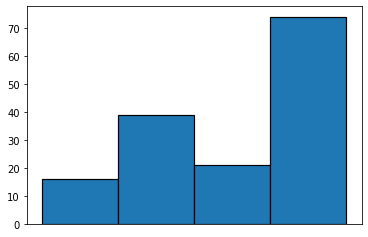

In [13]:
counts = []
for i in range(4):
    for j in range(len(bins[i])):
        if i==0:
            counts.append(0)
        elif i==1:
            counts.append(1)
        elif i==2:
            counts.append(2)
        else:
            counts.append(3)

ranges = [0,1,2,3,4]
frequencies,bins, _ = plt.hist(counts, ranges, edgecolor='black', linewidth=1.2)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
print("Frequencies ")
print("------------")
print(frequencies)

## 3-4-5 rule based Natural Segmentation
---

In [14]:
# Not done yet